In [ ]:
# Analisis oleh Dinmar Pratama
# Github : https://github.com/dinmar9212
# LinkedIn : https://www.linkedin.com/in/dinmar-pratama-2516b8224/

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro
import numpy as np
from statsmodels.stats.diagnostic import lilliefors

# 1. Membaca Data dan Pembersihan Awal

In [35]:
# =====================================================
# 1. Membaca Data dan Pembersihan Awal
# =====================================================

# Membaca data transaksi dari CSV dan menghapus kolom 'Unnamed: 0'
df = pd.read_csv('transaction_data.csv').drop(columns=['Unnamed: 0'])
df.dropna(inplace=True)  # Menghapus baris dengan missing values
df.reset_index(drop=True, inplace=True)

print("Data awal:")
df

Data awal:


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


# 2. Pemeriksaan Data Lanjutan

In [36]:
# =====================================================
# 2. Pemeriksaan Data Lanjutan
# =====================================================

# Mengecek jumlah missing values per kolom
print("\nJumlah missing values per kolom:")
df.isna().sum()


Jumlah missing values per kolom:


,0
transaction_id,0
product_id,0
CustomerID,0
transaction_date,0
online_order,0
order_status,0
brand,0
product_line,0
product_class,0
product_size,0


In [37]:
# Mengecek jumlah duplikasi data
print("\nJumlah data duplikat:")
df.duplicated().sum()


Jumlah data duplikat:


0

In [38]:
# Memilih variabel numerik (tipe number: float dan int)
numerik = df.select_dtypes(include='number')
print("\nContoh data numerik:")
numerik


Contoh data numerik:


,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
0,1,2,2950,71.49,53.62,41245.0
1,2,3,3120,2091.47,388.92,41701.0
2,3,37,402,1793.43,248.82,36361.0
3,4,88,3135,1198.46,381.10,36145.0
4,5,78,787,1765.30,709.48,42226.0
...,...,...,...,...,...,...
19440,19996,51,1018,2005.66,1203.40,37823.0
19441,19997,41,127,416.98,312.74,35560.0
19442,19998,87,2284,1636.90,44.71,40410.0
19443,19999,6,2764,227.88,136.73,38216.0


In [39]:
# Menampilkan deskripsi statistik variabel numerik secara ringkas
print("\nDeskripsi statistik variabel numerik:")
round(numerik.describe(), 2)


Deskripsi statistik variabel numerik:


,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
count,19445.00,19445.00,19445.00,19445.00,19445.00,19445.00
mean,9989.26,45.80,1739.47,1107.34,555.59,38201.76
std,5779.67,30.57,1011.89,582.66,405.60,2878.07
min,1.00,0.00,1.00,12.01,7.21,33259.00
25%,4976.00,18.00,857.00,575.27,215.14,35667.00
50%,9985.00,45.00,1741.00,1163.89,507.58,38216.00
75%,14997.00,72.00,2615.00,1635.30,795.10,40672.00
max,20000.00,100.00,5034.00,2091.47,1759.85,42710.00


In [40]:
# Memilih variabel kategorik (tipe object)
kategorik = df.select_dtypes(include='object')
print("\nContoh data kategorik:")
kategorik


Contoh data kategorik:


,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,InvoiceDate
0,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,2017-02-25
1,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2017-05-21
2,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,2017-10-16
3,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,2017-08-31
4,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,2017-10-01
...,...,...,...,...,...,...,...,...
19440,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2017-06-24
19441,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,2017-11-09
19442,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,2017-04-14
19443,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,2017-07-03


# 3. Tranformasi Tanggal dan Informasi Data

In [41]:
# =====================================================
# 3. Transformasi Tanggal dan Informasi Data
# =====================================================

# Mengubah kolom 'InvoiceDate' menjadi tipe datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("\nInformasi Data setelah konversi InvoiceDate:")
df.info()


Informasi Data setelah konversi InvoiceDate:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  object        
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float6

In [42]:
# Mengubah kolom 'transaction_date' menjadi tipe datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
print("\nInformasi Data setelah konversi transaction_date:")
df.info()


Informasi Data setelah konversi transaction_date:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  f

In [43]:
# Mengubah kolom 'product_first_sold_date' menjadi tipe datetime
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date'])
print("\nInformasi Data setelah konversi product_first_sold_date:")
df.info()


Informasi Data setelah konversi product_first_sold_date:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-

In [44]:
# Ekstraksi informasi bulan dari 'InvoiceDate'
print("\nContoh bulan dari InvoiceDate:")
df['InvoiceDate'].dt.month


Contoh bulan dari InvoiceDate:


,InvoiceDate
0,2
1,5
2,10
3,8
4,10
...,...
19440,6
19441,11
19442,4
19443,7


In [45]:
# Mengubah 'InvoiceDate' menjadi period (format bulan/tahun)
print("\nContoh InvoiceDate dalam format period (M):")
df['InvoiceDate'].dt.to_period('M')


Contoh InvoiceDate dalam format period (M):


,InvoiceDate
0,2017-02
1,2017-05
2,2017-10
3,2017-08
4,2017-10
...,...
19440,2017-06
19441,2017-11
19442,2017-04
19443,2017-07


In [46]:
# Mendapatkan tanggal transaksi pertama (minimum) per CustomerID
print("\nTanggal transaksi pertama tiap CustomerID:")
df.groupby('CustomerID')['InvoiceDate'].min()


Tanggal transaksi pertama tiap CustomerID:


,InvoiceDate
CustomerID,
1,2017-01-05
2,2017-05-04
3,2017-02-23
4,2017-04-03
5,2017-03-03
...,...
3497,2017-09-01
3498,2017-02-03
3499,2017-01-12


In [47]:
# Menggunakan transform untuk mendapatkan tanggal transaksi pertama untuk tiap baris
print("\nContoh hasil transformasi tanggal pertama per CustomerID:")
df.groupby('CustomerID')['InvoiceDate'].transform('min')


Contoh hasil transformasi tanggal pertama per CustomerID:


,InvoiceDate
0,2017-02-25
1,2017-01-20
2,2017-01-29
3,2017-02-08
4,2017-01-24
...,...
19440,2017-01-25
19441,2017-01-03
19442,2017-04-06
19443,2017-02-27


In [48]:
# Menambahkan kolom 'Acquisiton_Date' sebagai bulan akuisisi pelanggan (periode)
df['Acquisiton_Date'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
print("\nData dengan kolom Acquisiton_Date:")
df.head(5)


Data dengan kolom Acquisiton_Date:


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Acquisiton_Date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,2017-02-25,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,2017-05-21,2017-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,2017-10-16,2017-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,2017-08-31,2017-02
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,2017-10-01,2017-01


In [49]:
# Melihat frekuensi tiap nilai 'Acquisiton_Date'
print("\nFrekuensi tiap Acquisiton_Date:")
df['Acquisiton_Date'].value_counts()


Frekuensi tiap Acquisiton_Date:


,count
Acquisiton_Date,
2017-01,8254
2017-02,4694
2017-03,2651
2017-04,1756
2017-05,954
2017-06,537
2017-07,299
2017-08,163
2017-09,60


In [50]:
# Menambahkan kolom 'Transaction Month' untuk menyimpan bulan transaksi
df['Transaction Month'] = df['InvoiceDate'].dt.to_period('M')
print("\nData dengan kolom Transaction Month:")
df.head()


Data dengan kolom Transaction Month:


,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Acquisiton_Date,Transaction Month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,2017-02-25,2017-02,2017-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,2017-05-21,2017-01,2017-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,2017-10-16,2017-01,2017-10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,2017-08-31,2017-02,2017-08
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,2017-10-01,2017-01,2017-10


# 4. Pembuatan Tabel Cohort

In [51]:
# =====================================================
# 4. Pembuatan Tabel Cohort
# =====================================================

# Mengelompokkan data berdasarkan 'Acquisiton_Date' dan 'Transaction Month'
# serta menghitung jumlah unik CustomerID per kelompok
cohort_table = df.groupby(['Acquisiton_Date', 'Transaction Month'])['CustomerID'].nunique().rename('Jumlah User').reset_index()
print("\nTabel Cohort:")
cohort_table.head()


Tabel Cohort:


,Acquisiton_Date,Transaction Month,Jumlah User
0,2017-01,2017-01,1321
1,2017-01,2017-02,464
2,2017-01,2017-03,477
3,2017-01,2017-04,483
4,2017-01,2017-05,480


In [52]:
# Informasi mengenai tabel cohort
print("\nInformasi Tabel Cohort:")
cohort_table.info()


Informasi Tabel Cohort:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Acquisiton_Date    78 non-null     period[M]
 1   Transaction Month  78 non-null     period[M]
 2   Jumlah User        78 non-null     int64    
dtypes: int64(1), period[M](2)
memory usage: 2.0 KB


In [53]:
# Menghitung 'Period Month' sebagai selisih bulan antara Transaction Month dan Acquisiton_Date
cohort_table['Period Month'] = cohort_table['Transaction Month'].dt.month - cohort_table['Acquisiton_Date'].dt.month
print("\nTabel Cohort dengan kolom Period Month:")
cohort_table.head()


Tabel Cohort dengan kolom Period Month:


,Acquisiton_Date,Transaction Month,Jumlah User,Period Month
0,2017-01,2017-01,1321,0
1,2017-01,2017-02,464,1
2,2017-01,2017-03,477,2
3,2017-01,2017-04,483,3
4,2017-01,2017-05,480,4


In [54]:
# Membuat pivot table agar baris adalah Acquisiton_Date dan kolom adalah Period Month
cohort_pivot = cohort_table.pivot_table(index='Acquisiton_Date', columns='Period Month', values='Jumlah User')
print("\nPivot Table Cohort:")
cohort_pivot


Pivot Table Cohort:


Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisiton_Date,,,,,,,,,,,,
2017-01,1321.0,464.0,477.0,483.0,480.0,462.0,493.0,502.0,479.0,501.0,471.0,494.0
2017-02,794.0,310.0,291.0,306.0,277.0,291.0,303.0,275.0,322.0,297.0,282.0,NaN
2017-03,490.0,169.0,171.0,165.0,179.0,184.0,168.0,206.0,184.0,186.0,NaN,NaN
2017-04,341.0,110.0,119.0,155.0,142.0,123.0,141.0,124.0,132.0,NaN,NaN,NaN
2017-05,214.0,87.0,77.0,86.0,70.0,73.0,72.0,81.0,NaN,NaN,NaN,NaN
2017-06,128.0,49.0,46.0,51.0,49.0,47.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07,83.0,29.0,31.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,54.0,18.0,23.0,18.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,25.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Menghitung persentase retensi dengan membagi tiap nilai baris dengan nilai periode pertama
cohort_pivot_per = cohort_pivot.apply(lambda x: x / x.iloc[0] * 100, axis=1)
print("\nPivot Table Cohort dalam persen:")
cohort_pivot_per


Pivot Table Cohort dalam persen:


Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisiton_Date,,,,,,,,,,,,
2017-01,100.0,35.124905,36.109008,36.563210,36.336109,34.973505,37.320212,38.001514,36.260409,37.925814,35.654807,37.395912
2017-02,100.0,39.042821,36.649874,38.539043,34.886650,36.649874,38.161209,34.634761,40.554156,37.405542,35.516373,NaN
2017-03,100.0,34.489796,34.897959,33.673469,36.530612,37.551020,34.285714,42.040816,37.551020,37.959184,NaN,NaN
2017-04,100.0,32.258065,34.897361,45.454545,41.642229,36.070381,41.348974,36.363636,38.709677,NaN,NaN,NaN
2017-05,100.0,40.654206,35.981308,40.186916,32.710280,34.112150,33.644860,37.850467,NaN,NaN,NaN,NaN
2017-06,100.0,38.281250,35.937500,39.843750,38.281250,36.718750,40.625000,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,34.939759,37.349398,39.759036,46.987952,30.120482,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,33.333333,42.592593,33.333333,27.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,28.000000,32.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Visualisasi Cohort dengan Heatmap

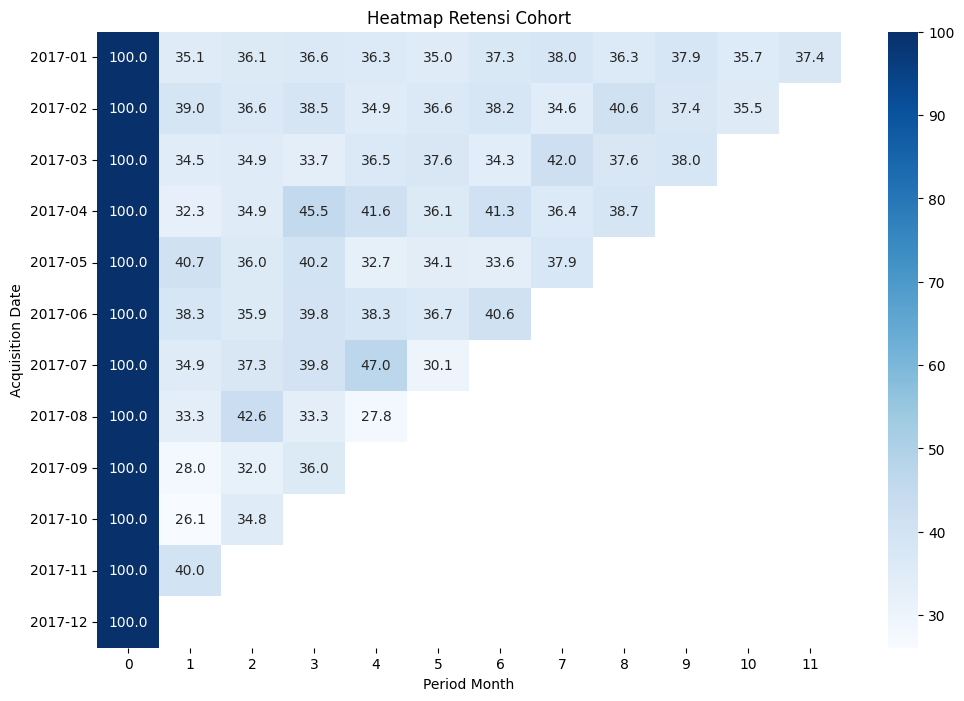

In [56]:
# =====================================================
# 5. Visualisasi Cohort dengan Heatmap
# =====================================================

plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot_per, annot=True, cmap='Blues', fmt='.1f')
plt.title("Heatmap Retensi Cohort")
plt.xlabel("Period Month")
plt.ylabel("Acquisition Date")
plt.show()

# 6. Uji Statistika (Normalitas)

In [63]:
# =====================================================
# 6. Uji Normalitas (KS Test, Shapiro-Wilk, dan Lilliefors)
# =====================================================
print("\nUji Normalitas untuk masing-masing kolom numerik:\n")
for col in numerik.columns:
    data = numerik[col].dropna()  # Pastikan data tidak memiliki missing values

    # Uji Kolmogorov-Smirnov (KS Test)
    # Normalisasi data ke z-score agar dibandingkan dengan distribusi normal standar
    mean = data.mean()
    std = data.std()
    data_norm = (data - mean) / std
    ks_stat, ks_p = kstest(data_norm, 'norm')

    # Uji Shapiro-Wilk
    shapiro_stat, shapiro_p = shapiro(data)

    # Uji Lilliefors (Liliefors Test)
    lillie_stat, lillie_p = lilliefors(data)

    print(f"Kolom: {col}")
    # Interpretasi KS Test
    print(f"  KS Test: stat = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    if ks_p < 0.05:
        print("    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (KS Test)")
    else:
        print("    --> Hipotesis nol diterima: Data terdistribusi normal (KS Test)")

    # Interpretasi Shapiro-Wilk Test
    print(f"  Shapiro-Wilk: stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
    if shapiro_p < 0.05:
        print("    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (Shapiro-Wilk)")
    else:
        print("    --> Hipotesis nol diterima: Data terdistribusi normal (Shapiro-Wilk)")

    # Interpretasi Lilliefors Test
    print(f"  Lilliefors Test: stat = {lillie_stat:.4f}, p-value = {lillie_p:.4f}")
    if lillie_p < 0.05:
        print("    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (Lilliefors Test)")
    else:
        print("    --> Hipotesis nol diterima: Data terdistribusi normal (Lilliefors Test)")

    print()


Uji Normalitas untuk masing-masing kolom numerik:

Kolom: transaction_id
  KS Test: stat = 0.0578, p-value = 0.0000
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (KS Test)
  Shapiro-Wilk: stat = 0.9547, p-value = 0.0000
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (Shapiro-Wilk)
  Lilliefors Test: stat = 0.0578, p-value = 0.0010
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (Lilliefors Test)

Kolom: product_id
  KS Test: stat = 0.0705, p-value = 0.0000
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (KS Test)
  Shapiro-Wilk: stat = 0.9443, p-value = 0.0000
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (Shapiro-Wilk)
  Lilliefors Test: stat = 0.0705, p-value = 0.0010
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (Lilliefors Test)

Kolom: CustomerID
  KS Test: stat = 0.0593, p-value = 0.0000
    --> Hipotesis nol ditolak: Data tidak terdistribusi normal (KS Test)
  Shapiro-Wilk: stat = 0

# 7. Grafik Perbedaan Proporsi Retensi Antar Periode

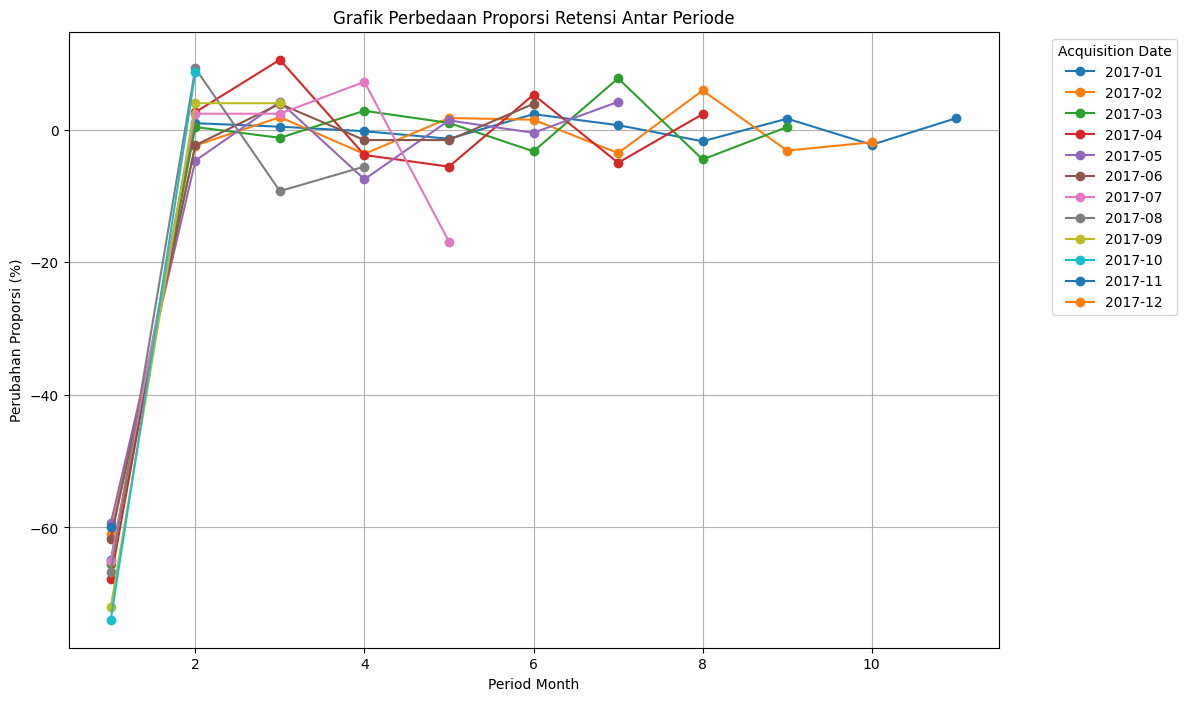

In [58]:
# =====================================================
# 7. Grafik Perbedaan Proporsi Retensi Antar Periode
# =====================================================
# Menghitung selisih antar periode pada pivot table persentase retensi
cohort_diff = cohort_pivot_per.diff(axis=1)

plt.figure(figsize=(12, 8))
for cohort in cohort_diff.index:
    plt.plot(cohort_diff.columns, cohort_diff.loc[cohort], marker='o', label=str(cohort))
plt.title("Grafik Perbedaan Proporsi Retensi Antar Periode")
plt.xlabel("Period Month")
plt.ylabel("Perubahan Proporsi (%)")
plt.legend(title="Acquisition Date", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
